In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

In [121]:
df=pd.read_csv(r"C:\Users\sbana\DATA SCIENCE PROJECTS\NETFLIX FORCASTING\Netflix-Subscriptions.csv")

In [98]:
df.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


In [122]:
df['Time Period']=pd.to_datetime(df['Time Period'],format='%d/%m/%Y')
# df['Time Period']=df['Time Period'].dt.date
df.set_index('Time Period',inplace=True)

In [123]:
df.head()

,Subscribers
Time Period,
2013-04-01,34240000
2013-07-01,35640000
2013-10-01,38010000
2014-01-01,41430000
2014-04-01,46130000


In [141]:
df.isnull().sum()  #any null values

Subscribers    0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2013-04-01 to 2023-07-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Subscribers  42 non-null     int64
dtypes: int64(1)
memory usage: 1.7 KB


In [8]:
df.describe()

,Subscribers
count,4.200000e+01
mean,1.304243e+08
std,6.891896e+07
min,3.424000e+07
25%,6.722500e+07
50%,1.216250e+08
75%,2.015325e+08
max,2.383900e+08


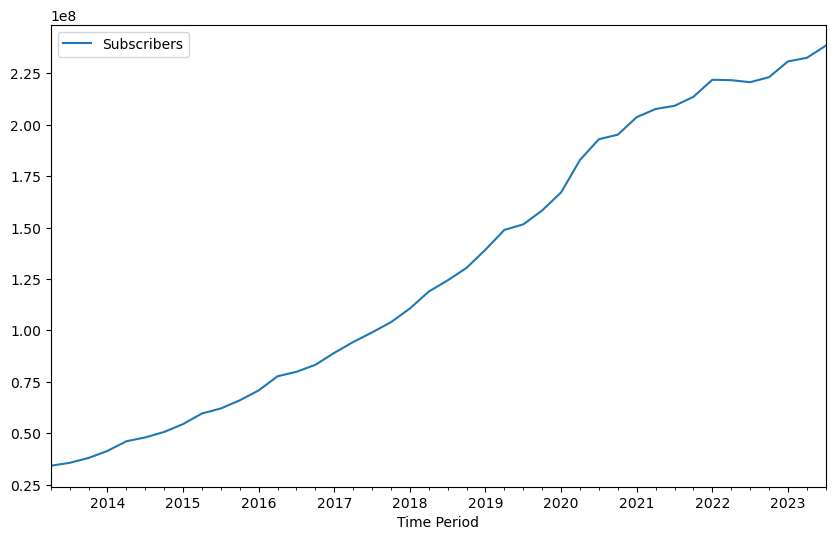

In [143]:
#visualize the data

df.plot(figsize=(10,6))

plt.show()

Clearly there is trend and since mean is not constant over time, this is not stationary. 

In [144]:
#Lets check the quarterly growth rate
df['Quarterly growth rate']=df['Subscribers'].pct_change()*100

In [145]:
df.head()

,Subscribers,Quarterly growth rate
Time Period,,
2013-04-01,34240000,NaN
2013-07-01,35640000,4.088785
2013-10-01,38010000,6.649832
2014-01-01,41430000,8.997632
2014-04-01,46130000,11.344436


In [146]:
df['Quarterly growth rate'].fillna(0,inplace=True)

<Axes: xlabel='Time Period'>

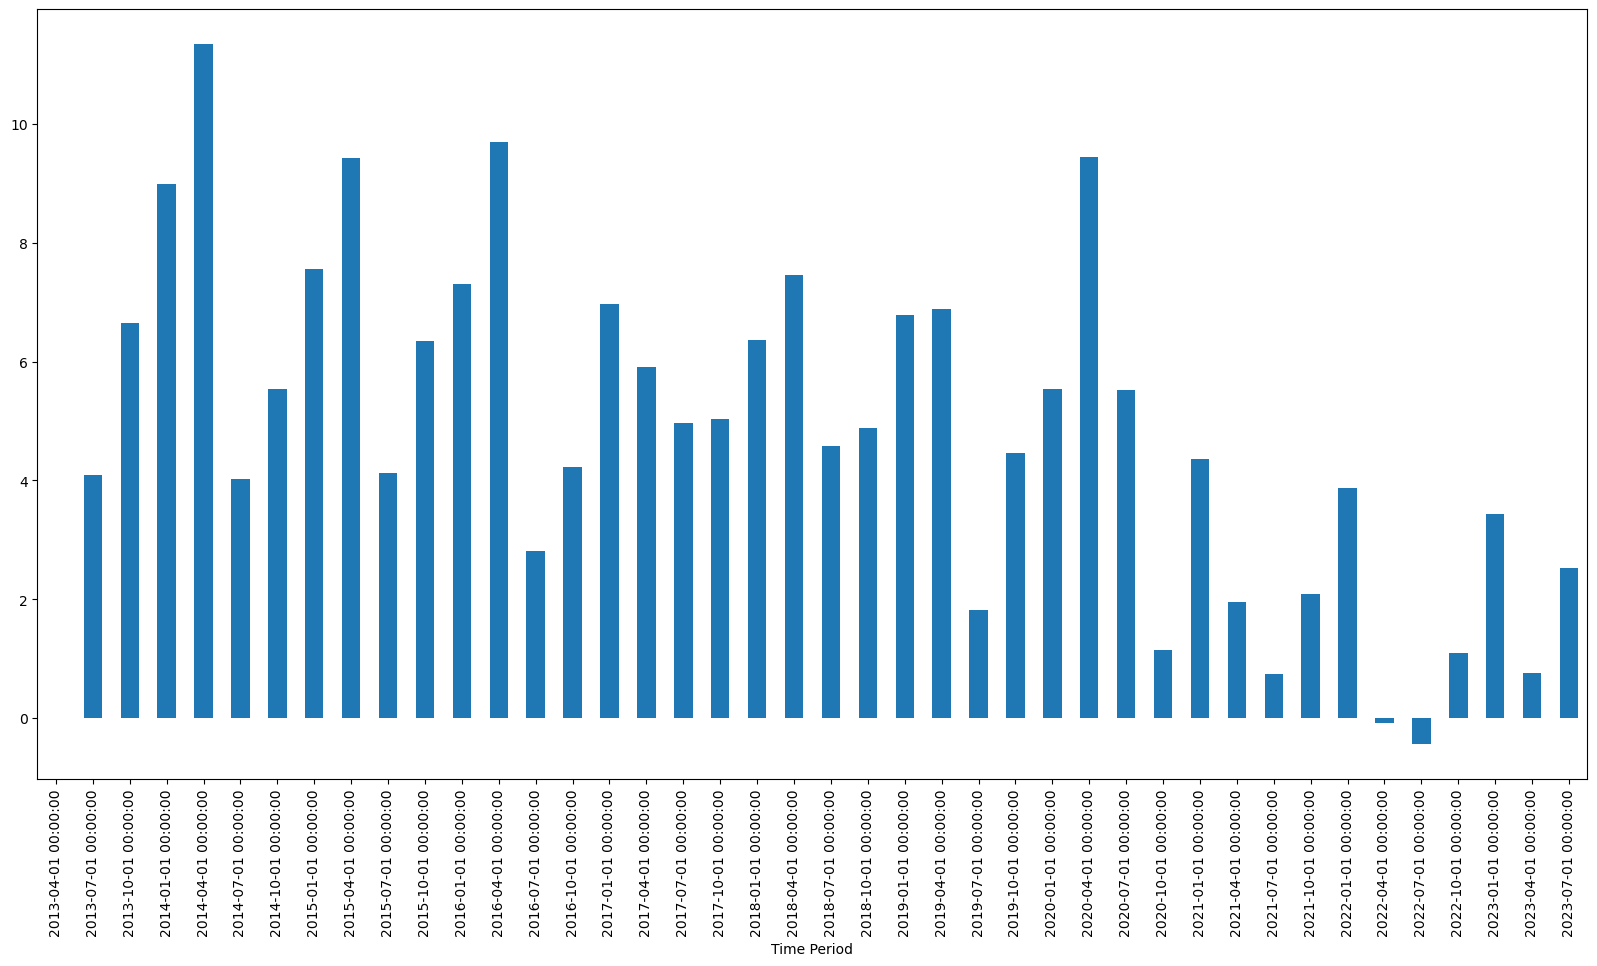

In [147]:
df['Quarterly growth rate'].plot(kind='bar',figsize=(20,10))

In [148]:
df.drop(['Quarterly growth rate'],axis=1,inplace=True)

In [149]:
##TAKING DIFFERENCE
df['first difference']=df['Subscribers'].diff()

In [150]:
df.head()

,Subscribers,first difference
Time Period,,
2013-04-01,34240000,NaN
2013-07-01,35640000,1400000.0
2013-10-01,38010000,2370000.0
2014-01-01,41430000,3420000.0
2014-04-01,46130000,4700000.0


In [17]:
df['difference']=df['Subscribers']-df['Subscribers'].shift(1)

In [18]:
df.drop('difference',axis=1,inplace=True)

In [19]:
df.head()

,Subscribers,first difference
Time Period,,
2013-01-04,34240000,NaN
2013-01-07,35640000,1400000.0
2013-01-10,38010000,2370000.0
2014-01-01,41430000,3420000.0
2014-01-04,46130000,4700000.0


In [151]:
test_result=adfuller(df['Subscribers'])

In [152]:
test_result

(0.20591078338329463,
 0.9725911700133492,
 1,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 1023.0000365635849)

We can see a p-value>0.05, so not stationary

In [153]:
test_stationarity_2=adfuller(df['first difference'].dropna())

In [154]:
test_stationarity_2

(-4.523088428253381,
 0.00017858926729786263,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 989.8123754489892)

Clearly, p <<0.05, which says that the first difference is stationary


<Axes: xlabel='Time Period'>

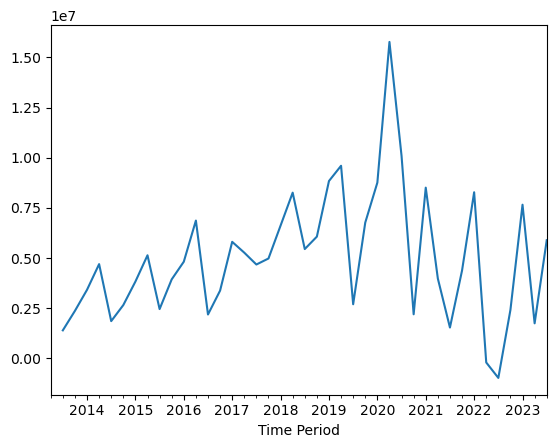

In [155]:
df['first difference'].plot()

modelling


We are using a ARIMA model. ARIMA model requires three hyper parameters-p,q,d. We can get p and q from acf and pacf plots and d id the number of differencing it took to make the time series stationary. d=1 in this case

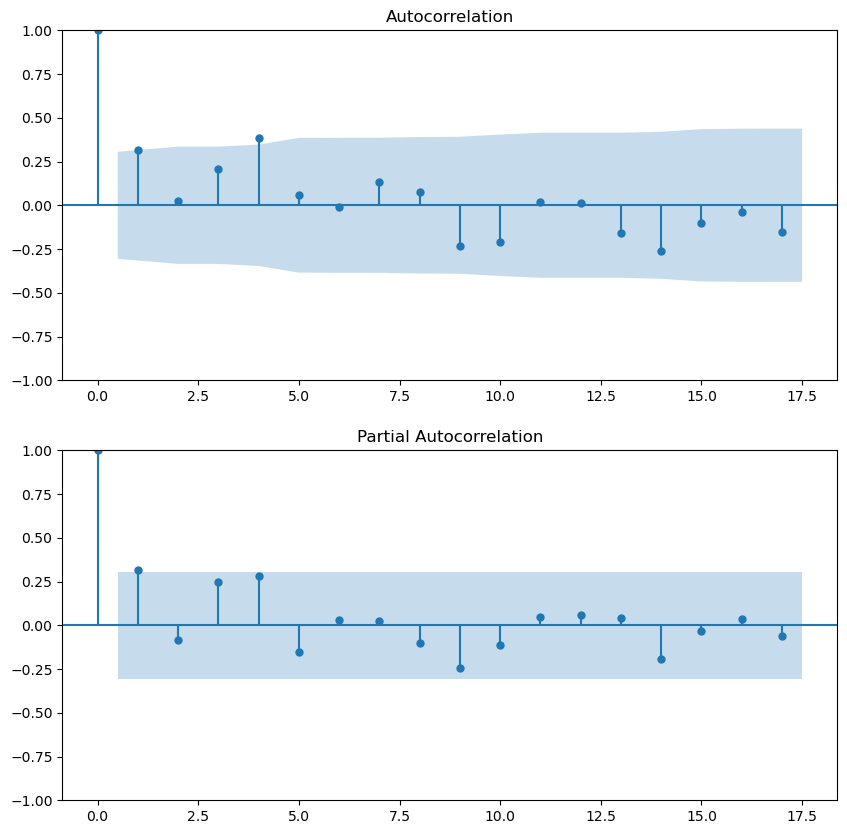

In [156]:
fig,axs=plt.subplots(2,figsize=(10,10))
plot_acf(df['first difference'].iloc[1:],ax=axs[0])
plot_pacf(df['first difference'].iloc[1:],ax=axs[1])
plt.show()

We can get the order of the AR model from the PCAF plot. We can see that after lag 1 , the pcaf values are statistically very low with very low significance. So we will consider p=1


For the q value, which is the order of the MA model, we check the acf values for the lag. The ACF values cuts off at lag 1 , so q=1

In [160]:
##make predictions on test data
split_point=int(len(df)*0.8) 
# splitting the data into training and testing data in 80:20 ratio
train_data=df['Subscribers'].iloc[:split_point]
test_data=df['Subscribers'].iloc[split_point:]


In [159]:
train_df.shape

(33,)

In [124]:
# train_end = datetime(2021,7,1)
# test_end = datetime(2023,7,1)

# train_data = df['Subscribers'][:train_end]
# test_data = df['Subscribers'][train_end + timedelta(days=1):test_end]


In [125]:
test_end

datetime.datetime(2023, 7, 1, 0, 0)

In [69]:
split_point=int(len(df)*0.8) 
df.iloc[split_point]

Subscribers         209180000.0
first difference      1540000.0
Name: 2021-01-07, dtype: float64

In [161]:
train_data.shape,test_data.shape

((33,), (9,))

In [162]:
train_data

Time Period
2013-04-01     34240000
2013-07-01     35640000
2013-10-01     38010000
2014-01-01     41430000
2014-04-01     46130000
2014-07-01     47990000
2014-10-01     50650000
2015-01-01     54480000
2015-04-01     59620000
2015-07-01     62080000
2015-10-01     66020000
2016-01-01     70840000
2016-04-01     77710000
2016-07-01     79900000
2016-10-01     83280000
2017-01-01     89090000
2017-04-01     94360000
2017-07-01     99040000
2017-10-01    104020000
2018-01-01    110640000
2018-04-01    118900000
2018-07-01    124350000
2018-10-01    130420000
2019-01-01    139260000
2019-04-01    148860000
2019-07-01    151560000
2019-10-01    158330000
2020-01-01    167090000
2020-04-01    182860000
2020-07-01    192950000
2020-10-01    195150000
2021-01-01    203660000
2021-04-01    207640000
Name: Subscribers, dtype: int64

In [165]:
#p=1,d=1,q=1
model=ARIMA(train_data,order=(1,1,1))
start=time.time()
model_fit=model.fit()
end=time.time()
print('time taken',end-start,'secs')

time taken 0.05489706993103027 secs


C:\Users\sbana\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\sbana\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\sbana\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [166]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -523.883
Date:                Sun, 04 Feb 2024   AIC                           1053.766
Time:                        23:56:37   BIC                           1058.163
Sample:                    04-01-2013   HQIC                          1055.224
                         - 04-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.003    297.835      0.000       0.993       1.007
ma.L1         -0.9970      0.204     -4.895      0.000      -1.396      -0.598
sigma2      1.024e+13   1.99e-14   5.13e+26      0.0

In [167]:
###MAKING PREDICTION
start_date=test_data.index[0]
end_date=test_data.index[-1]

In [168]:
start_date

Timestamp('2021-07-01 00:00:00')

In [170]:
predictions=model_fit.predict(start=start_date,end=end_date)
residuals=test_df-predictions

In [171]:
predictions

2021-07-01    2.130341e+08
2021-10-01    2.184281e+08
2022-01-01    2.238219e+08
2022-04-01    2.292156e+08
2022-07-01    2.346092e+08
2022-10-01    2.400026e+08
2023-01-01    2.453959e+08
2023-04-01    2.507891e+08
2023-07-01    2.561821e+08
Freq: QS-OCT, Name: predicted_mean, dtype: float64

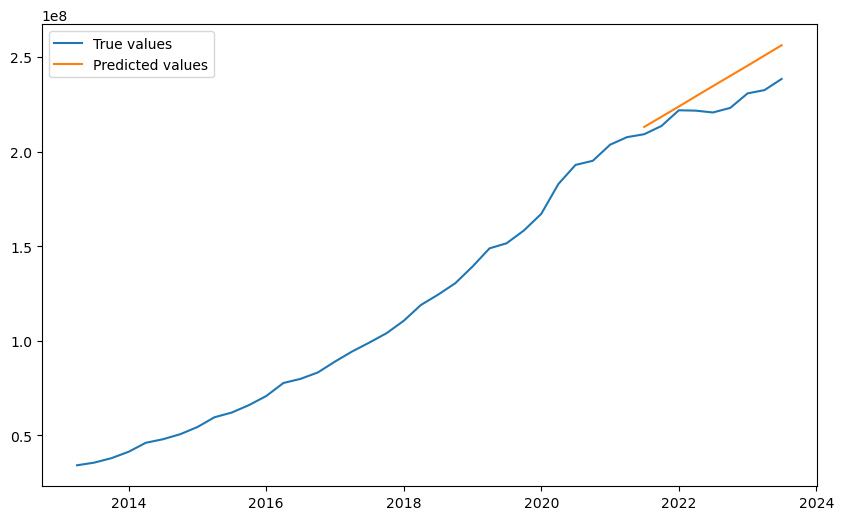

In [176]:
plt.figure(figsize=(10,6))
plt.plot(df['Subscribers'],label='True values')
plt.plot(predictions,label='Predicted values')
plt.legend()  
plt.show()           

In [179]:
#forcasting future
model_1=ARIMA(df['Subscribers'],order=(1,1,1))
model_fit_1=model.fit()

C:\Users\sbana\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\sbana\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\sbana\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [181]:
future_quarters=4
predictions_1=model_fit_1.predict(start=len(df),end=len(df)+future_quarters-1)


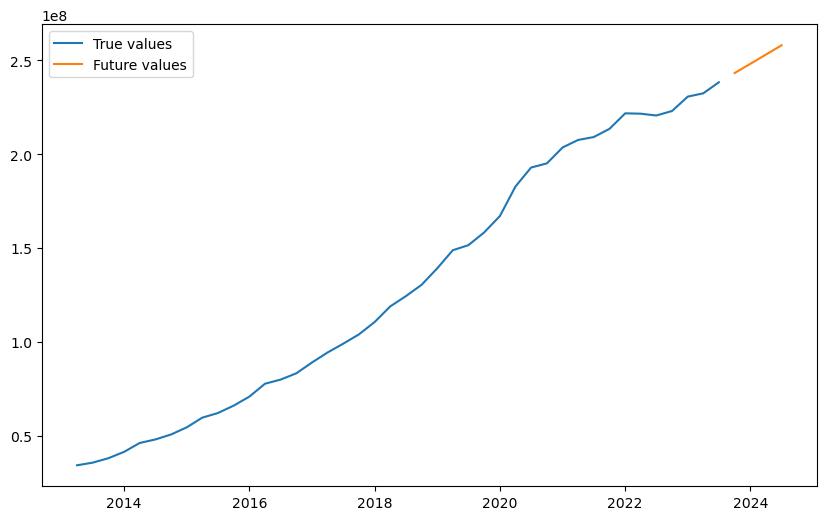

In [182]:
plt.figure(figsize=(10,6))
plt.plot(df['Subscribers'],label='True values')
plt.plot(predictions_1,label='Future values')
plt.legend()  
plt.show()  